# Predict Insurance Cost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [141]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Exploratory Data Analysis

<AxesSubplot:>

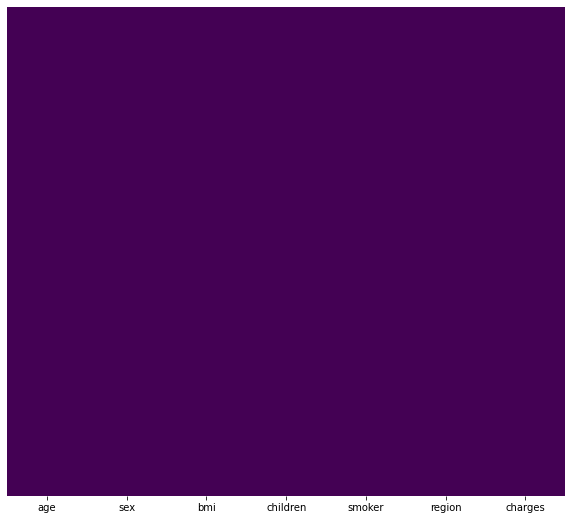

In [14]:
plt.figure(figsize=(10,9))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

In [21]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

male      676
female    662
Name: sex, dtype: int64


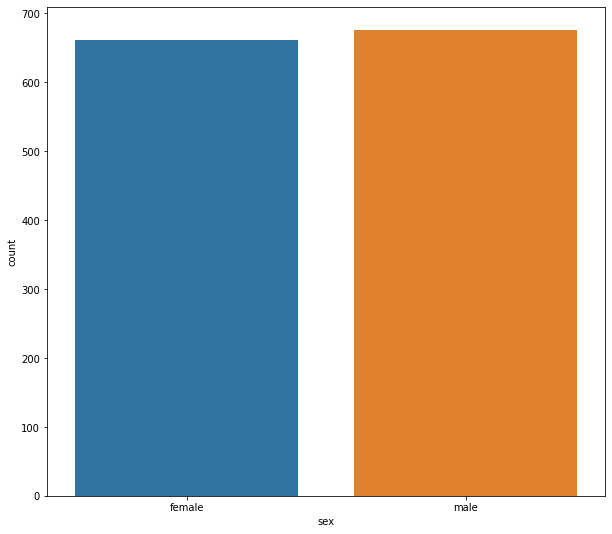

In [30]:
plt.figure(figsize=(10,9))
sns.countplot(x='sex',data=df)
print(df['sex'].value_counts())

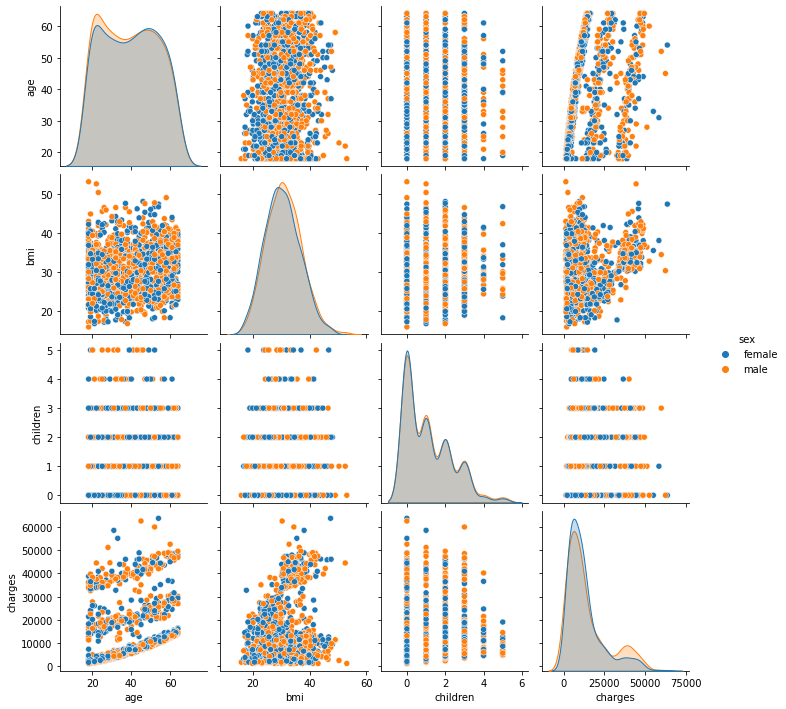

In [33]:
sns.pairplot(df,hue='sex')

<AxesSubplot:xlabel='children', ylabel='charges'>

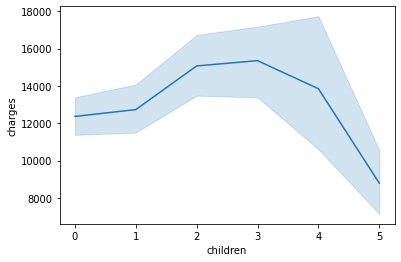

In [46]:
sns.lineplot(x='children',y='charges',data=df)


<AxesSubplot:xlabel='smoker', ylabel='charges'>

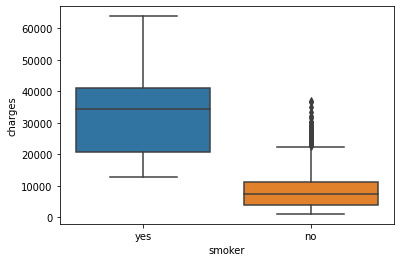

In [48]:
sns.boxplot(x='smoker',y='charges',data=df)


<AxesSubplot:xlabel='region', ylabel='count'>

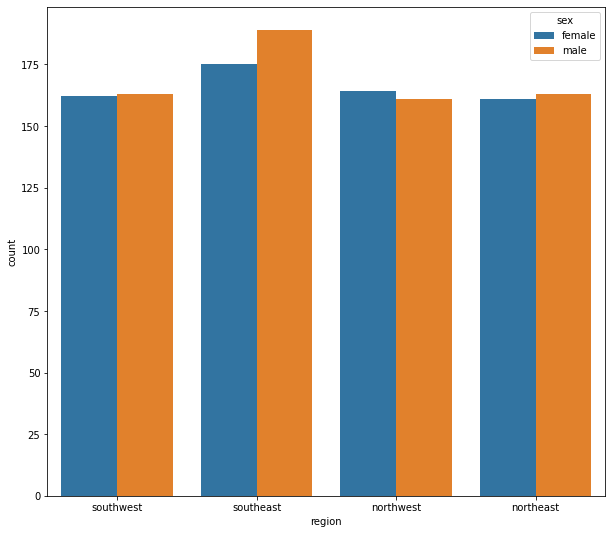

In [51]:
plt.figure(figsize=(10,9))
sns.countplot(x='region',hue='sex',data=df)

In [142]:
ysmoker = pd.get_dummies(df['smoker'],drop_first=True)
df = pd.concat([df,ysmoker],axis=1)

In [143]:
df.rename(columns={'yes':'ysmoker'},inplace=True)
df.drop('smoker',axis=1,inplace=True)

In [144]:
sex = pd.get_dummies(df['sex'],drop_first=True)
region = pd.get_dummies(df['region'],drop_first=True)
df = pd.concat([df,sex,region],axis=1)
df.drop(['sex','region'],axis=1,inplace=True)
df

,age,bmi,children,charges,ysmoker,male,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [146]:
children = pd.get_dummies(df['children'],drop_first=True)
df = pd.concat([df,children],axis=1)
df.drop('children',axis=1,inplace=True)

In [162]:
df.rename(columns={1:'1',2:'2',3:'3',4:'4',5:'5'},inplace=True)

<AxesSubplot:>

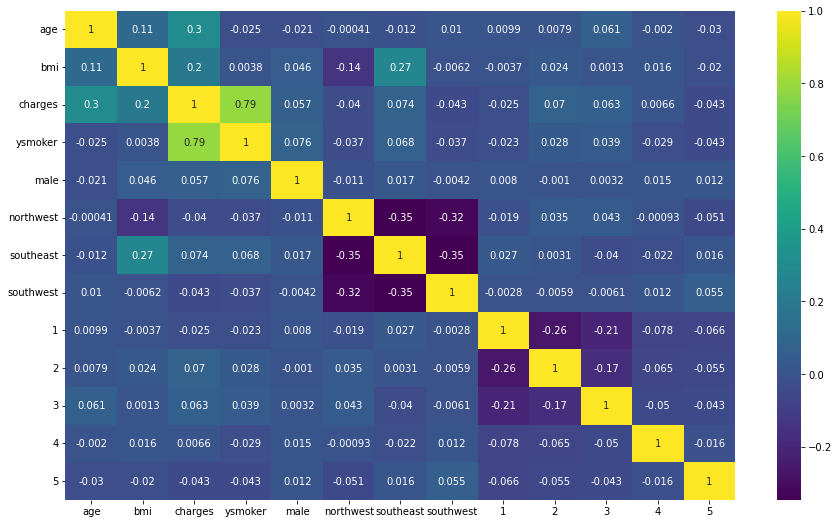

In [163]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

# My foundings:

1) More male members are taking the insurance

2) Most people taking insurance have no children.

3) Insurance charges increase until 3 children and then significantly decrease.

4) charges for a smoker are significantly high. even the median value is right skewed.

5) in southeast region, most insurances are paid, while a nice founding that in the northwest region, mostly the female population are opting for the insurance.

# Prediction phase

In [164]:
df.columns


Index(['age', 'bmi', 'charges', 'ysmoker', 'male', 'northwest', 'southeast',
       'southwest', '1', '2', '3', '4', '5'],
      dtype='object')

In [189]:
X = pd.DataFrame(df[['age','ysmoker','bmi', 'male', 'northwest',
       'southeast', 'southwest','1','2','3','4','5']])

In [190]:
y = pd.DataFrame(df['charges'])

In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=47)

In [229]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [230]:
lm.fit(X_train,y_train)

LinearRegression()

In [231]:
y_pred = lm.predict(X_test)

/home/keshav/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

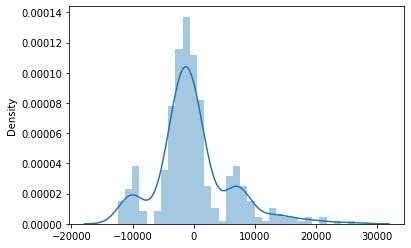

In [232]:
sns.distplot((y_test-y_pred))

In [233]:
fdf = pd.DataFrame(lm.coef_.reshape(12,1),X.columns,columns=["Coefficient"])
fdf

,Coefficient
age,261.160846
ysmoker,23956.836114
bmi,293.188781
male,-287.313960
northwest,443.561927
southeast,-432.196634
southwest,-389.942959
1,-52.875113
2,1892.012912
3,615.281966


In [234]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [235]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

In [236]:
rmse

6024.379170978745

In [237]:
r2

0.7558766752488295